In [1]:
# Import libraries

import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report, confusion_matrix

# Read and transform data
mnist = fetch_mldata('MNIST original')
inputData, y = mnist["data"], mnist["target"]

inputData = inputData / 255
nDigits = 10

yOneHot = np.zeros([y.shape[0],nDigits])
for i in range(y.shape[0]):
    yOneHot[i,y[i].astype(int)]=1

y = yOneHot

m = 60000
m_test = inputData.shape[0] - m

y_train, y_test = y[:m,:].reshape(m,nDigits), y[m:,:].reshape(m_test,nDigits)
InputData_train, InputData_test = inputData[:m,:], inputData[m:,:]


np.random.seed(1002)

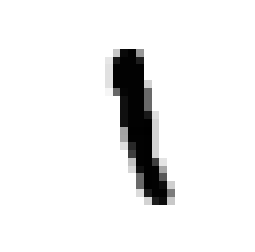

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [2]:
# Show a random input

i = 7000
plt.imshow(InputData_train[i,:].reshape(28,28), cmap = matplotlib.cm.binary)
plt.axis("off")
plt.show()
print(y_train[i,:])

In [3]:
# Define activation, loss, and their derivatives

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(z):
    return z * (1-z)

def relu (x):
    return np.maximum(0,x) # ReLU is very simple

def relu_derivative(x):
    return 0.5 * (np.sign(x)+1) # ReLU derivative is either zero or 1.

def CrossEntropyLoss(y, y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

def softmax(y):
    return np.exp(y) / np.sum(np.exp(y), axis=0)

def CE_Softmax_Derivative(output, ideal_output):
    return output - ideal_output

In [4]:
inputDim = InputData_train.shape[1]
nHidden = 64
learning_rate = 1
weight_decay = 0.001

W1 = 0.01*np.random.randn(nHidden, inputDim)
b1 = np.zeros((nHidden, 1))
W2 = 0.01*np.random.randn(nDigits, nHidden)
b2 = np.zeros((nDigits, 1))

inputData = InputData_train
y = y_train

Epoch 0 cost:  2.302592668306746
Epoch 10 cost:  1.4091096148519344
Epoch 20 cost:  1.5579844613684706
Epoch 30 cost:  1.395071119738517
Epoch 40 cost:  1.1065635639513847
Epoch 50 cost:  0.6427288131296715
Epoch 60 cost:  0.5583252961708036
Epoch 70 cost:  0.5612934702627731
Epoch 80 cost:  1.0183354266603744
Epoch 90 cost:  0.6152199732930002


<function matplotlib.pyplot.show>

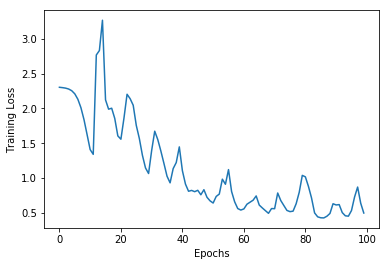

In [5]:
nEpochs = 100
costPlot = np.zeros(nEpochs)

for i in range(nEpochs):

    Z1 = np.matmul(W1,inputData.T) + b1
    A1 = relu(Z1)
    Z2 = np.matmul(W2,A1) + b2
    A2 = softmax(Z2)

    cost = CrossEntropyLoss(y.T, A2)
    costPlot[i] = cost

    dZ2 = CE_Softmax_Derivative(A2,y.T)
    dW2 = (1./m) * np.matmul(dZ2, A1.T)
    db2 = (1./m) * np.sum(dZ2, axis=1, keepdims=True)

    dA1 = np.matmul(W2.T, dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = (1./m) * np.matmul(dZ1, inputData)
    db1 = (1./m) * np.sum(dZ1, axis=1, keepdims=True)

    W2 -= learning_rate * dW2 + weight_decay * W2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1 + weight_decay * W1
    b1 -= learning_rate * db1
    
    if (i % 10 == 0):
        print("Epoch", i, "cost: ", cost)
    
plt.plot(costPlot)
plt.xlabel('Epochs')
plt.ylabel('Training Loss')
plt.show

In [6]:
Z1 = np.matmul(W1, InputData_test.T) + b1
A1 = relu(Z1)
Z2 = np.matmul(W2, A1) + b2

predictions = np.argmax(Z2, axis=0)
labels = np.argmax(y_test.T, axis=0)

print(confusion_matrix(predictions, labels))
print(classification_report(predictions, labels))

[[ 954    0   12    3    1   19   14    5    7   14]
 [   0 1095    6    1    6    2    3   16   12    4]
 [   3    2  886   37    7    3    4   24   12    4]
 [   0    1    8  851    0   55    0    0    8    8]
 [   0    1   15    1  809   10   10    5    7   12]
 [   5    0    1   31    1  685   24    0   21    5]
 [   9    4   16    5   13   25  896    0   14    0]
 [   1    3   24   22    3   11    1  925    9   24]
 [   8   29   56   47   17   71    6    8  871   28]
 [   0    0    8   12  125   11    0   45   13  910]]
             precision    recall  f1-score   support

          0       0.97      0.93      0.95      1029
          1       0.96      0.96      0.96      1145
          2       0.86      0.90      0.88       982
          3       0.84      0.91      0.88       931
          4       0.82      0.93      0.87       870
          5       0.77      0.89      0.82       773
          6       0.94      0.91      0.92       982
          7       0.90      0.90      0.90  